# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import numpy as np
import pandas as pd

#df = pd.read_csv('data/Advertising.csv',index_col=0)
df = pd.read_csv('Advertising.csv',index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
missing_values = df.isnull().sum()
missing_values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [3]:
df_cleaned = df.dropna()
df_cleaned.head(), missing_values

(      TV  radio  newspaper  sales
 1  230.1   37.8       69.2   22.1
 2   44.5   39.3       45.1   10.4
 3   17.2   45.9       69.3    9.3
 4  151.5   41.3       58.5   18.5
 5  180.8   10.8       58.4   12.9,
 TV           0
 radio        0
 newspaper    0
 sales        0
 dtype: int64)

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
# разделяем на переменные предикторы и целевую переменную и преобразуем в массивы 
X = df_cleaned.drop(columns=['sales']).values
y = df_cleaned['sales'].values

# отобразить что получилось
X.shape, y.shape

((200, 3), (200,))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
# Реализация координатного спуска для линейной регрессии

# Параметры алгоритма
num_iters = 1000  # количество итераций
m, n = X.shape    # количество строк и столбцов в матрице X
w = np.zeros((n, 1))  # вектор весов, инициализированный нулями

# Координатный спуск
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:, :k] @ w[:k]) + (X[:, k+1:] @ w[k+1:])
        # Обновляем значение k-ого коэффициента
        w[k] = (X[:, k].T @ (y - h)) / np.sum(X[:, k] ** 2)
        # Вычисляем функцию потерь (на каждой итерации, если нужно)
        cost = np.sum((X @ w - y) ** 2) / m

# Вывод финальных весов модели
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [8]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [9]:
# вычисляем среднее и стандартное отклонение для каждого стобца
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# масштабируем каждый столбец: (X - среднее)/ стандартное отклонение
X_scaled = (X - mu)/ sigma

**Добавим единичный столбец**

In [10]:
X_scaled = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

# выводим первые 5 строк отмасштабированных данных

X_scaled[:5]

array([[ 1.        ,  1.        ,  0.96985227,  0.98152247,  1.77894547],
       [ 1.        ,  1.        , -1.19737623,  1.08280781,  0.66957876],
       [ 1.        ,  1.        , -1.51615499,  1.52846331,  1.78354865],
       [ 1.        ,  1.        ,  0.05204968,  1.21785493,  1.28640506],
       [ 1.        ,  1.        ,  0.3941822 , -0.84161366,  1.28180188]])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [11]:
def mse_error(y_true, y_pred):
    """
    Функция для вычисления среднеквадратичной ошибки (MSE).
    
    Аргументы:
    y_true -- реальные значения
    y_pred -- предсказанные значения
    
    Возвращает:
    mse -- значение среднеквадратичной ошибки
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [12]:
# Наивный прогноз: предсказание продаж средним значением
y_mean_pred = np.mean(y) * np.ones(y.shape)

# Рассчитываем среднеквадратичную ошибку для наивного прогноза
mse_naive = mse_error(y, y_mean_pred)

# Выводим MSE наивного прогноза
print("MSE наивного прогноза:", round(mse_naive,2))

MSE наивного прогноза: 27.09


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [13]:
def lin_pred(X, w):
    """
    Функция для получения прогнозов линейной модели.
    
    Аргументы:
    X -- матрица предикторов (размерности m x n)
    w -- вектор весов (размерности n x 1)
    
    Возвращает:
    y_pred -- вектор прогнозов (размерности m x 1)
    """
    y_pred = X @ w # матричное умножение X на w
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [14]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Выполняет шаг стохастического градиентного спуска.

    Аргументы:
    X -- матрица предикторов (размерности m x n)
    y -- вектор целевых значений (размерности m x 1)
    w -- вектор весов (размерности n x 1)
    train_ind -- индекс объекта обучающей выборки (строки матрицы X)
    eta -- шаг градиентного спуска (скорость обучения)

    Возвращает:
    w_new -- обновленный вектор весов
    """
    m = X.shape[0]  # количество объектов в выборке
    
    # Прогноз для объекта train_ind
    y_pred = X[train_ind] @ w
    
    # Направление изменения
    gradient = 2 * X[train_ind].T * (y_pred - y[train_ind]) / m
    
    # Обновление весов
    w_new = w - eta * gradient
    
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [15]:
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    """
    Реализует стохастический градиентный спуск.

    Аргументы:
    X -- матрица признаков (размерности m x n)
    y -- вектор целевых переменных (размерности m x 1)
    w_init -- начальный вектор весов (размерности n x 1)
    eta -- шаг обучения (скорость обучения)
    max_iter -- максимальное количество итераций
    tol -- минимальное евклидово расстояние между весами для прекращения работы

    Возвращает:
    w -- финальный вектор весов (размерности n x 1)
    errors -- список ошибок MSE на каждой итерации
    """
    # Инициализируем начальные параметры
    w = w_init
    prev_w = np.inf * np.ones_like(w)
    m = X.shape[0]  # количество объектов
    errors = []  # список для хранения ошибок MSE
    num_iter = 0  # счетчик итераций
    
    # Основной цикл стохастического градиентного спуска
    while np.linalg.norm(w - prev_w) > tol and num_iter < max_iter:
        # Генерация случайного индекса обучающей выборки
        random_ind = np.random.randint(m)
        
        # Обновление весов с помощью функции stoch_grad_step
        prev_w = w.copy()
        w = stoch_grad_step(X, y, w, random_ind, eta)
        
        # Вычисляем прогнозы и MSE для текущих весов
        y_pred = lin_pred(X, w)
        mse = mse_error(y, y_pred)
        errors.append(mse)  # Записываем текущее значение ошибки
        
        # Увеличиваем счетчик итераций
        num_iter += 1
    
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

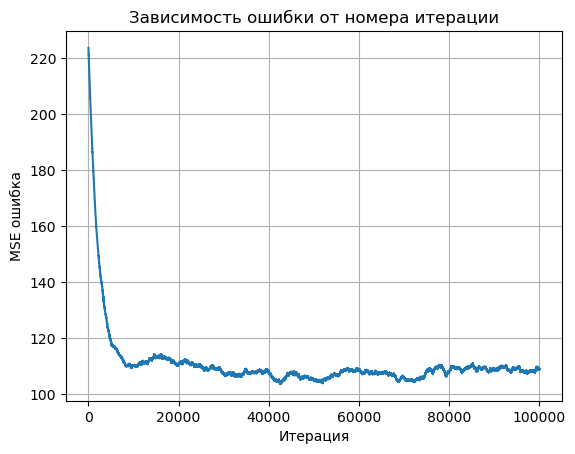

In [16]:
import matplotlib.pyplot as plt

# Параметры для стохастического градиентного спуска
eta = 0.01  # темп обучения
max_iter = 10**5  # максимальное количество итераций
tol = 1e-6  # евклидово расстояние для прекращения работы

# Инициализируем вектор весов нулями
w_init = np.zeros((X_scaled.shape[1], 1))

# Запускаем стохастический градиентный спуск
w_final, errors = stochastic_gradient_descent(X_scaled, y, w_init, eta, max_iter, tol)

# График зависимости ошибки от номера итерации
plt.plot(errors)
plt.title("Зависимость ошибки от номера итерации")
plt.xlabel("Итерация")
plt.ylabel("MSE ошибка")
plt.grid(True)
plt.show()



**Выведите вектор весов, к которому сошелся метод.**

In [17]:
# Вывод финального вектора весов
print("Вектор весов, к которому сошелся метод:", w_final)

Вектор весов, к которому сошелся метод: [[7.00519118 7.00519118 3.65053154 2.22210478 0.82404757]
 [7.00519118 7.00519118 3.65053154 2.22210478 0.82404757]
 [7.00519118 7.00519118 3.65053154 2.22210478 0.82404757]
 [7.00519118 7.00519118 3.65053154 2.22210478 0.82404757]
 [7.00519118 7.00519118 3.65053154 2.22210478 0.82404757]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [18]:
# Вывод MSE на последней итерации
print("MSE на последней итерации:", errors[-1])

MSE на последней итерации: 108.75308664734735


w = [ 41.56217205 110.13144155  73.52860638  -0.55006384]
w.shape = (4,)


Text(0.5, 1.0, 'График зависимости ошибок (MSE/MAE) от номера итерации')

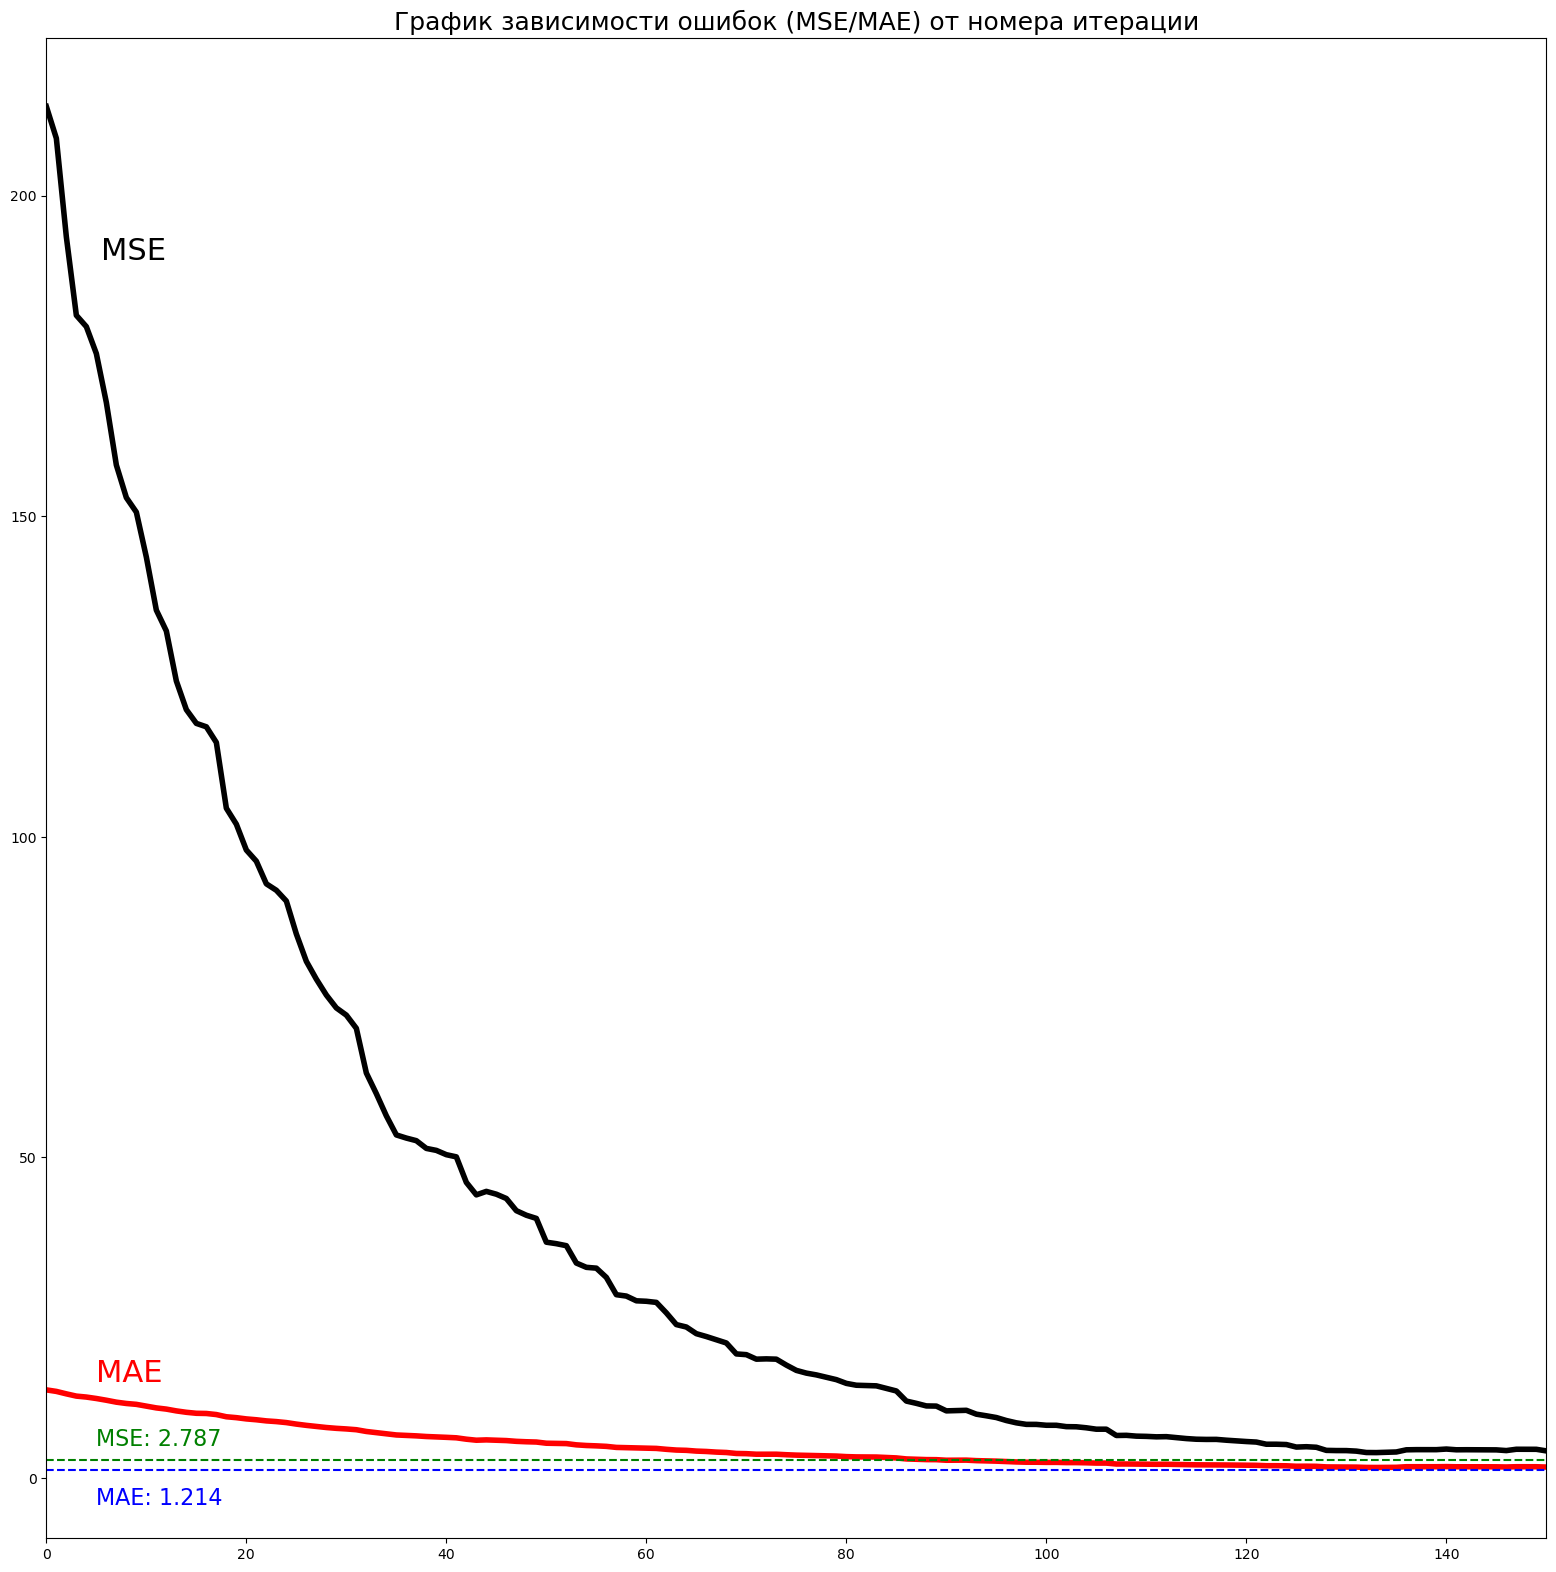

In [32]:
import pandas as pd
import numpy as np

data = pd.read_csv('Advertising.zip', index_col=0)
X = np.array(data[['TV','radio','newspaper']])
y = np.array(data['sales'])
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
X = X / np.sqrt(np.sum(np.square(X), axis=0))

num_iters = 130 # опытным путём добиваемся минимальной разницы с предсказаниями модели за меньшее число итерации
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n,1))
for i in range(num_iters):

    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
  
w = w.T[0]
print(f'w = {w}')
print(f'w.shape = {w.shape}')

X = np.array(data[['TV','radio','newspaper']])
X = (X - X.mean(axis=0)) / X.std(axis=0) 
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

def mse_error(y_real, y_pred):
    return np.square(np.subtract(y_real, y_pred)).mean()
def mae_error(y_real, y_pred):
    return np.mean(np.abs(y_real - y_pred))

def lin_reg(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)

w = lin_reg(X, y).T

def lin_pred(X,w):
    res = np.zeros([len(X),1])
    for i in range(len(X)):
        res[i] = (np.dot(w,X[i]))
    return res

y_pred = lin_pred(X, w)

def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    w_new = 2 * eta * X[train_ind] * (np.dot(w, X[train_ind]) - y[train_ind]) / y[train_ind].size
    return (w - w_new)

def stochastic_gradient_descent(X, y, w, eta=0.1, max_iter=10000, min_distance=0.000001):
    distance = np.inf 
    w_init = w
    mse_errors = []
    mae_errors = []
    w_values_list = []
    iter_count = 0
    np.random.seed(42)
    while distance > min_distance and iter_count < max_iter:
        random_ind = np.random.randint(X.shape[0])
        distance = np.linalg.norm(w-stoch_grad_step(X, y, w, random_ind, eta))
        w_new = stoch_grad_step(X, y, w, random_ind, eta)
        mse_errors.append(mse_error(y, lin_pred(X, w_new)))
        mae_errors.append(mae_error(y, lin_pred(X, w_new)))
        w_values_list.append(w)
        w = w_new
        iter_count += 1  
    return w, w_values_list, mse_errors, mae_errors, iter_count

w, w_values, mse_errors, mae_errors, iter_count = stochastic_gradient_descent(X, y, np.zeros(4), 0.01, 10000, 0.0001)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))
ax = fig.add_axes([0.3,0.3,1,1])
ax.plot(mse_errors, c='k', linewidth=4)
ax.plot(mae_errors, c='r', linewidth=4)
ax.set_xlim(0,150)
ax.hlines(np.array(mse_errors).min(),0,200, color='g', linestyle='--')
ax.text(5, 5, f'MSE: {round(np.array(mse_errors).min(),3)}', fontsize = 16, color='g')
ax.hlines(np.array(mae_errors).min(),0,200, color='b', linestyle='--')
ax.text(5, -4.2, f'MAE: {round(np.array(mae_errors).min(),3)}', fontsize = 16, color='b')
ax.text(5, 15, f'MAE', fontsize = 22, color='r')
ax.text(5.5, 190, f'MSE', fontsize = 22, color='k')
ax.set_title('График зависимости ошибок (MSE/MAE) от номера итерации',fontsize = 18)